In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import power_divergence
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
import itertools
import random
import statistics
import re
import math
from itertools import islice


In [3]:
from network import *
from loaders import *
from plot_n_fit import *
from graph_tools import *

In [4]:
from IPython.core.display import Image, display

In [5]:

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [6]:
def plot_weighet_graph(graph, weights=None):
    if weights == None:
        weights = [1] * len(graph.nodes())
    
    nodesize = [weights[v] * 10000 for v in graph]
    try:
        pos=nx.nx_agraph.graphviz_layout(graph)
    except:
        pos=nx.spring_layout(graph,iterations=20)
    nx.draw(graph, node_size=nodesize, pos=pos, node_color="w")
    nx.draw_networkx_labels(graph, pos)
    

In [7]:
def get_time_seriece(weights_per_period, node):
    return [weights.get(node, 0.0) for weights in weights_per_period]

In [8]:
def get_weights_in_period(file ,start, end):
    coauthorNetwork = load_with_loader(file, parse_dataset_file, lambda article: start <= article.year < end)
    (auth_subgraph, auth_weights, auth_sorted_nodes) = calc_pagerank(coauthorNetwork.gr)
    (cite_subgraph, cite_weights, cite_sorted_nodes) = calc_pagerank(coauthorNetwork.cgr)
    print("Top researchers", cite_sorted_nodes[:10])
    return ((auth_weights, auth_sorted_nodes), (cite_weights, cite_sorted_nodes) )

In [9]:
coauthorNetwork = CoauthorNetwork.load_with_loader("./data/out_test.txt", parse_dataset_file);


#run_analyse("./data/out_test.txt")
#run_analyse("./data/authors/Database.txt")
#run_analyse("./data/authors/Data Mining.txt")
#run_analyse("./data/authors/Theory.txt")
#run_analyse("./data/authors/Visualization.txt")


Uniq authors: 42619


 
Connected component distribution (log-scale)
pfinal: [ 1.49087221 -0.34784088]
covar: [[ 0.0048186  -0.00126261]
 [-0.00126261  0.00033522]]
Ampli = 30.97 +/-  0.57
Index = -0.35 +/-  0.07


/home/generall/sources/upwork/ahmed/network.py:25: RuntimeWarning: divide by zero encountered in power
  powerlaw = lambda x, amp, index: amp * (x**index)


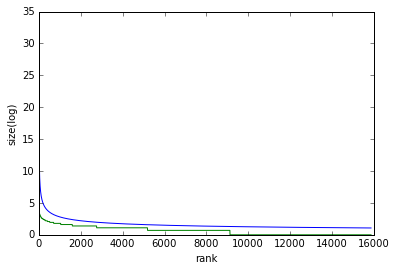

Power_divergenceResult(statistic=3128355.7077359874, pvalue=0.0)
Connected component count: 15871
----------
Authors count: 2870
Mean distance: 12.613749128919862
 
Distance distribution


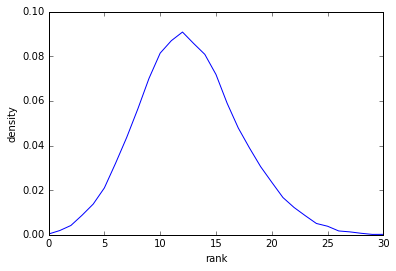

Top 10 authors by degree centrality measurement: [('Laurence T. Yang', 0.011850819100731963), ('Myra Spiliopoulou', 0.009759498082955734), ('Wei Wang', 0.009410944579993029), ('Katsumi Tanaka', 0.009062391077030324), ('Jie Yang', 0.009062391077030324), ('Jun Wang', 0.00871383757406762), ('Don Towsley', 0.008365284071104914), ('Peter Lendermann', 0.008365284071104914), ('Heinrich C. Mayr', 0.00801673056814221), ('Simon J. E. Taylor', 0.007668177065179505)]
Top 10 authors by betweenness centrality measurement: [('Yi Pan', 0.2941197297476155), ('Laurence T. Yang', 0.2750226025697141), ('Tsau Young Lin', 0.24943581120992478), ('Hai Jin', 0.22628042678309382), ('Yan Sun', 0.1918781458970298), ('Ling Chen', 0.18068717414574367), ('Wei Zhao', 0.18003784320603777), ('Jianying Zhou', 0.1695539821184287), ('Ying Li', 0.16460081176606292), ('Kam-Fai Wong', 0.16379050541926501)]
Top 10 authors by closeness centrality measurement: [('Yi Pan', 0.13016650787169365), ('Minyi Guo', 0.12707059969882187)

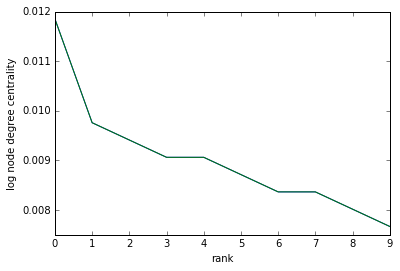

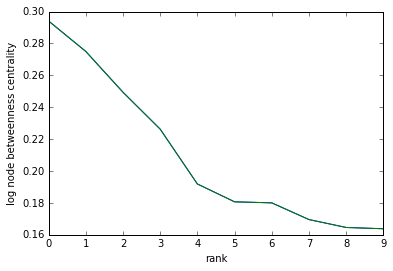

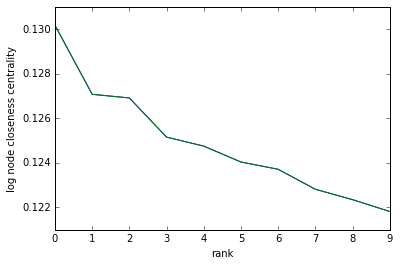

In [10]:

coauthorNetwork.gen_components()
coauthorNetwork.analize_component()
coauthorNetwork.print_info_component()


In [11]:
def calculate_cite_author_quantity_distribution(file, start, end):
    coauthor_network = CoauthorNetwork.load_with_loader(file, parse_dataset_file, lambda article: start <= article.year < end)
    dist = coauthor_network.calc_coauthor_cite_distribution()
    plot_pairs(dist[0], "number of coauthors", "article quantity")
    plot_pairs(dist[1], "number of citations", "article quantity")

# calculate_cite_author_quantity_distribution("./data/out_test.txt", 2000, 2001)

In [12]:
# Analyse time series
'''
file = "./data/out_test.txt"

coauthorNetwork = load_with_loader(file, parse_dataset_file)
nodes_count = len(coauthorNetwork.gr.nodes())

train_authros = coauthorNetwork.gr.nodes()[:nodes_count // 2]
test_authors = coauthorNetwork.gr.nodes()[nodes_count // 2:]

weights_per_period = []
weights_per_period.append(get_weights_in_period(file, 1990, 1995))
weights_per_period.append(get_weights_in_period(file, 1995, 2000))
weights_per_period.append(get_weights_in_period(file, 2000, 2005))
weights_per_period.append(get_weights_in_period(file, 2005, 2010))

weights_per_period_auth = [ w[0][0] for w in weights_per_period ]
weights_per_period_cite = [ w[1][0] for w in weights_per_period ]

x_train = [get_time_seriece(weights_per_period_auth, author) 
           + get_time_seriece(weights_per_period_cite[0:-1], author) for author in test_authors]
y_train = [weights_per_period_cite[-1].get(author, 0.0) for author in test_authors ]

# print("x_train", x_train[0:10])
# print("y_train", y_train[0:10])
x_test = [get_time_seriece(weights_per_period_auth, author) 
           + get_time_seriece(weights_per_period_cite[0:-1], author) for author in test_authors]
y_test = [weights_per_period_cite[-1].get(author, 0.0) for author in test_authors ]

lm = LinearRegression(normalize=True)
lm.fit(x_train, y_train)

for pair in zip(lm.predict(x_test)[0:10], y_test[0:10]):
    print(pair)
    
# print(lm.predict(x_test)[0:10])
# print(y_test[0:10])
'''


'\nfile = "./data/out_test.txt"\n\ncoauthorNetwork = load_with_loader(file, parse_dataset_file)\nnodes_count = len(coauthorNetwork.gr.nodes())\n\ntrain_authros = coauthorNetwork.gr.nodes()[:nodes_count // 2]\ntest_authors = coauthorNetwork.gr.nodes()[nodes_count // 2:]\n\nweights_per_period = []\nweights_per_period.append(get_weights_in_period(file, 1990, 1995))\nweights_per_period.append(get_weights_in_period(file, 1995, 2000))\nweights_per_period.append(get_weights_in_period(file, 2000, 2005))\nweights_per_period.append(get_weights_in_period(file, 2005, 2010))\n\nweights_per_period_auth = [ w[0][0] for w in weights_per_period ]\nweights_per_period_cite = [ w[1][0] for w in weights_per_period ]\n\nx_train = [get_time_seriece(weights_per_period_auth, author) \n           + get_time_seriece(weights_per_period_cite[0:-1], author) for author in test_authors]\ny_train = [weights_per_period_cite[-1].get(author, 0.0) for author in test_authors ]\n\n# print("x_train", x_train[0:10])\n# print(

In [13]:
stats = coauthorNetwork.top_authors_cite_coauth_stat()

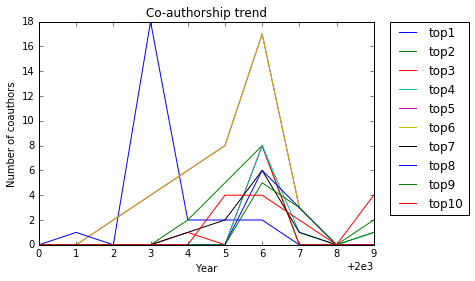

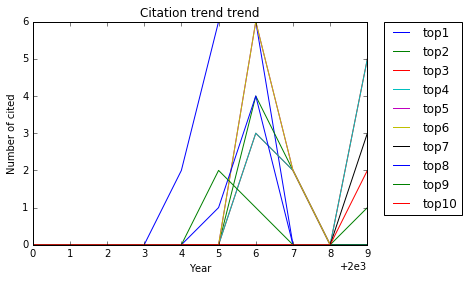

In [14]:
def render_stat(stat):
    for idx, author in enumerate(stat):
        rg = range(2000, 2010)
        author_line = [author.get(year, 0) for year in rg]
        plt.plot(list(rg), author_line, label="top" + str(idx + 1) ) 

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
plot_labels("Year", "Number of coauthors", "Co-authorship trend")
render_stat(stats[0])

plot_labels("Year", "Number of cited", "Citation trend trend")
render_stat(stats[1])


In [15]:
print("co-authors:")
for x in calc_pagerank(coauthorNetwork.gr, 10)[2]:
    print(x[0])
print("---------")
print("citation:")
for x in calc_pagerank(coauthorNetwork.cgr, 10)[2]:
    print(x[0])

co-authors:
Ed Tittel
Jun Wang
Wei Wang
Chin-Chen Chang
Gary B. Shelly
Thomas J. Cashman
Laurence T. Yang
Yan Zhang
Jie Yang
Lakhmi C. Jain
---------
citation:
Douglas C. Montgomery
Simon Haykin
Ian H. Witten
Eibe Frank
Konstantinos Koutroumbas
Sergios Theodoridis
Constantine A. Balanis
Robert G. Sargent
Lawrence M. Leemis
Marvin K. Simon
